<a href="https://colab.research.google.com/github/yustinaivanova/netology_statistics_february_20/blob/master/lecture_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import statistics
import seaborn as sns

## 1.Загрузить файл hr.csv.

In [2]:
file="HR.csv"
df=pd.read_csv(file)

In [3]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


## 2. Рассчитать основные статистики для переменных 
(среднее,медиана,мода,мин/макс,сред.отклонение).

In [4]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


Определим какие признаки числовые, а какие категориальные

In [6]:
categorical_columns = [col for col in df.columns if df[col].dtype.name == 'object']
numerical_columns =   [col for col in df.columns if df[col].dtype.name != 'object']
print(categorical_columns)
print(numerical_columns)

['sales', 'salary']
['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'left', 'promotion_last_5years']


Посмотрим на статистику числовых признаков

In [7]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [8]:
df.median()

satisfaction_level         0.64
last_evaluation            0.72
number_project             4.00
average_montly_hours     200.00
time_spend_company         3.00
Work_accident              0.00
left                       0.00
promotion_last_5years      0.00
dtype: float64

In [9]:
df.mode()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.1,0.55,4.0,135,3.0,0.0,0.0,0.0,sales,low
1,NaN,NaN,NaN,156,NaN,NaN,NaN,NaN,NaN,NaN



Не во всех колонках показывается мода, т.к. например в average_montly_hours нет уникальной моды.
average_montly_hours имеет максимальное кол-во (153) одинаковых значений: 135 и 156.
    

In [10]:
df['average_montly_hours'].value_counts()

156    153
135    153
149    148
151    147
160    136
      ... 
297      7
303      6
288      6
299      6
96       6
Name: average_montly_hours, Length: 215, dtype: int64

Посмотрим на категориальные признаки

In [13]:
df[categorical_columns].describe()

,sales,salary
count,14999,14999
unique,10,3
top,sales,low
freq,4140,7316


In [14]:
for col in categorical_columns:
    print(df[col].unique())

['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD']
['low' 'medium' 'high']


In [15]:
df['sales'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: sales, dtype: int64

In [16]:
df['salary'].value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64


## 3.Рассчитать и визуализировать корреляционную матрицу для переменных.


In [17]:
df.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


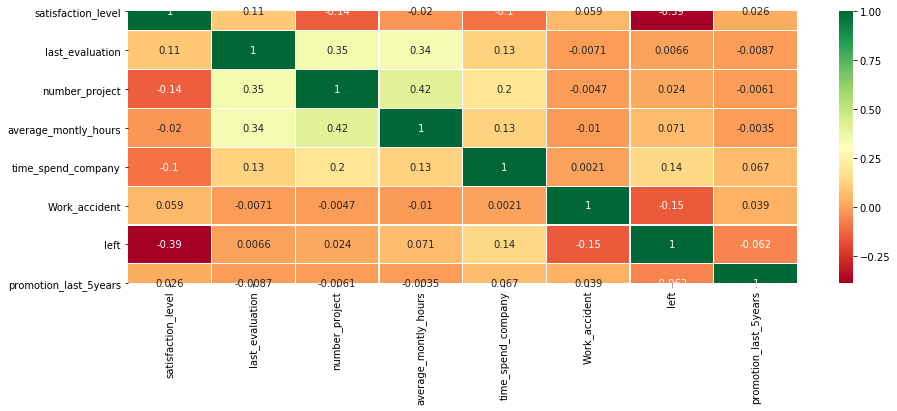

In [18]:
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(15,5)
plt.show()

In [ ]:

видим что есть некоторая корреляция между:
    left                 - satisfaction_level (-0.39)
    number_project       - last_evaluation (0.35)
    average_montly_hours - last_evaluation (0.34)
    average_montly_hours - number_project (0.42)



## 4.Визуализировать несколько взаимосвязей между переменными.


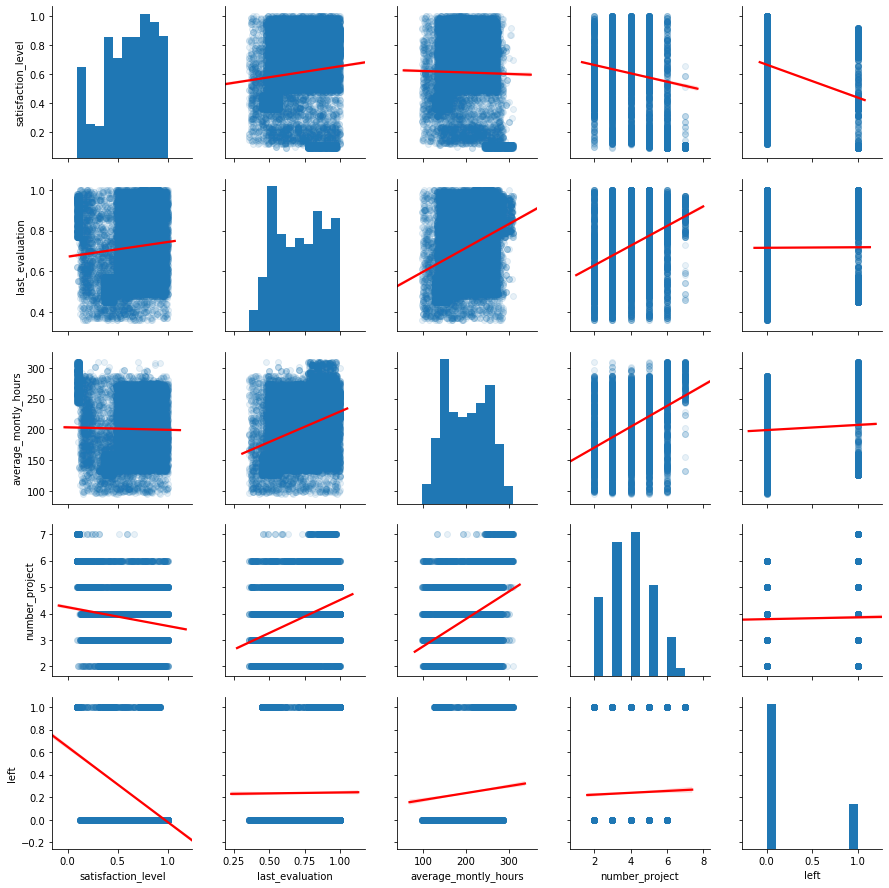

In [19]:
sns.pairplot(df, vars=['satisfaction_level', 'last_evaluation', 'average_montly_hours', 'number_project', 'left'], kind='reg', plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.1}})

выберем тех, кто покинул компанию и посмотрим на взаимосвязи

In [20]:
df_left = df[df['left'] == 1]

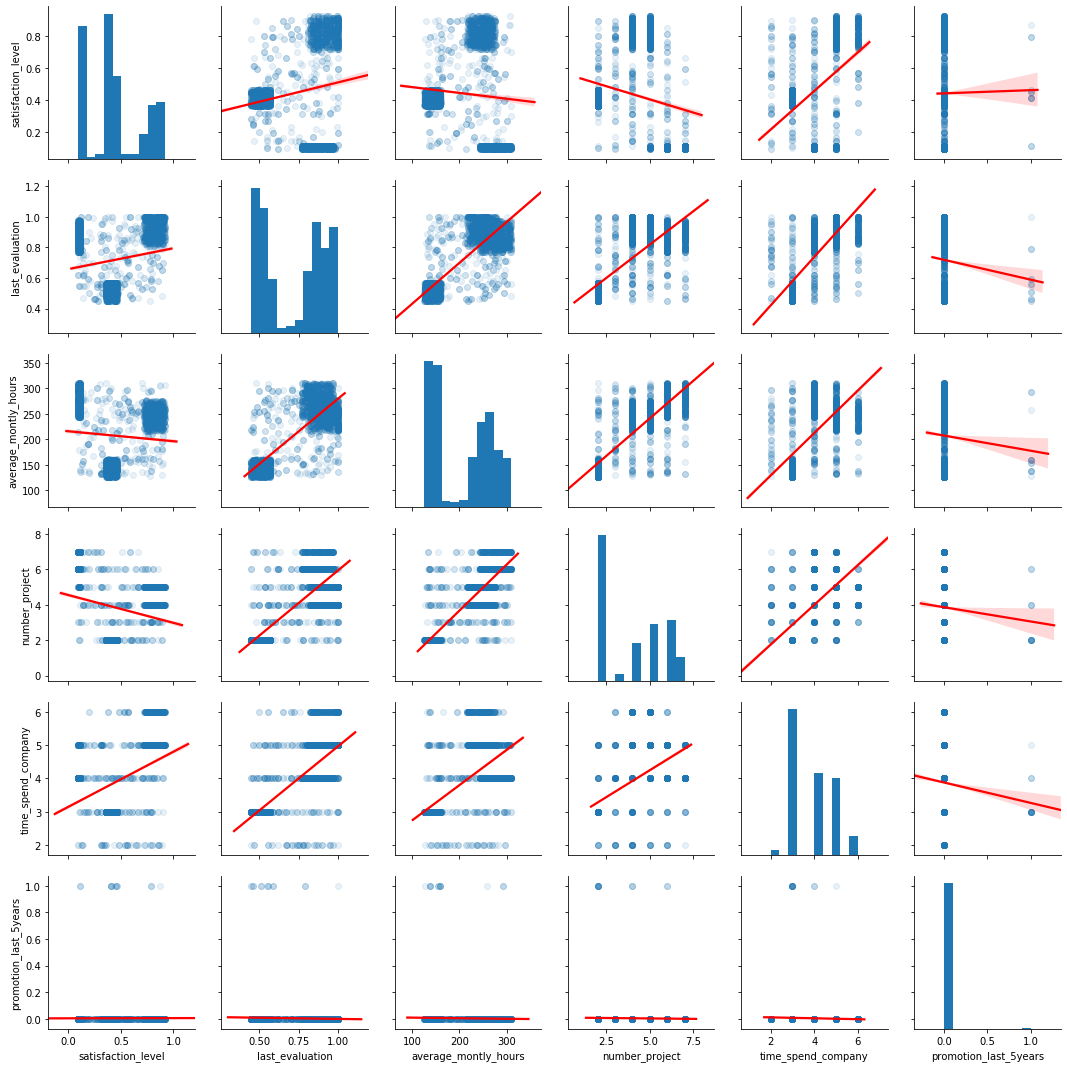

In [21]:
sns.pairplot(df_left, vars=['satisfaction_level', 'last_evaluation', 'average_montly_hours', 'number_project', 'time_spend_company', 'promotion_last_5years'], kind='reg', plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.1}})

In [ ]:

На графиках видно 2 области:
    1. Малое кол-во проектов, малое кол-во часов в месяц и слабая последняя оценка
    2. Кол-во проектов более 4, кол-во часов в месяц более 200 и последння оценка более 8

практически у всех не было повышения за 5 лет



Посмотрим на кол-во уволившихся сотрудников по стажу в компании.


In [22]:
df_left['time_spend_company'].value_counts()

3    1586
4     890
5     833
6     209
2      53
Name: time_spend_company, dtype: int64


## 5.С использованием t-test статистики проверить взаимосвязи между несколькими переменными.


In [ ]:
1. satisfaction_level не зависит от уровня зарплаты


In [25]:
df['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

In [26]:
salary_low =  df[df['salary'] == 'low']["satisfaction_level"]
salary_high = df[df['salary'] == 'high']["satisfaction_level"]
len(salary_low), len(salary_high)

(7316, 1237)

In [27]:
statistics.variance(salary_low), statistics.variance(salary_high)

(0.06481798361964357, 0.05143428811745715)

In [28]:
sts.ttest_ind(salary_low, salary_high)

Ttest_indResult(statistic=-4.76273109535092, pvalue=1.9413281282548522e-06)


т.к. р < 0.05, то отвергаем нулевую гипотезу.
(о том, что уровень зарплаты не влияет на удовлетворенность).


In [ ]:

2. чем больше average_montly_hours тем выше last_evaluation
нулевая гипотеза будет говорить о том, что average_montly_hours не влияет на last_evaluation


In [30]:
amh_200 =      df[df['average_montly_hours'] <= 200]["last_evaluation"]
amh_over_200 = df[df['average_montly_hours'] > 200]["last_evaluation"]
len(amh_200), len(amh_over_200)

(7524, 7475)

In [31]:
statistics.variance(amh_200), statistics.variance(amh_over_200)

(0.0280654549157526, 0.025467733493949592)

In [32]:
sts.ttest_ind(amh_200, amh_over_200)

Ttest_indResult(statistic=-37.64694709686235, pvalue=1.8663035106028564e-296)

т.к. р < 0.05, то отвергаем нулевую гипотезу.
(о том, average_montly_hours не влияет на last_evaluation).

## 6. Посмотрим сколько работников работает в каждом департаменте

In [33]:
df[df['left'] == 0].groupby('sales').count()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary
sales,,,,,,,,,
IT,954,954,954,954,954,954,954,954,954
RandD,666,666,666,666,666,666,666,666,666
accounting,563,563,563,563,563,563,563,563,563
hr,524,524,524,524,524,524,524,524,524
management,539,539,539,539,539,539,539,539,539
marketing,655,655,655,655,655,655,655,655,655
product_mng,704,704,704,704,704,704,704,704,704
sales,3126,3126,3126,3126,3126,3126,3126,3126,3126
support,1674,1674,1674,1674,1674,1674,1674,1674,1674


## 7. Показать распределение сотрудников по зарплатам.

In [34]:
df_noleft = df[df['left'] == 0]
df_noleft_salary = df_noleft.groupby('salary').count()
df_noleft_salary

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales
salary,,,,,,,,,
high,1155,1155,1155,1155,1155,1155,1155,1155,1155
low,5144,5144,5144,5144,5144,5144,5144,5144,5144
medium,5129,5129,5129,5129,5129,5129,5129,5129,5129


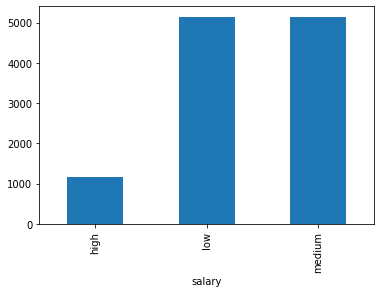

In [35]:
df_noleft_salary['satisfaction_level'].plot(kind="bar")

## 8. Показать распределение сотрудников по зарплатам совместно с департаментами.

In [36]:
df_noleft_salary_sales = df_noleft.groupby(['sales', 'salary']).count()
df_noleft_salary_sales

satisfaction_level  last_evaluation  number_project  \
sales       salary                                                        
IT          high                    79               79              79   
            low                    437              437             437   
            medium                 438              438             438   
RandD       high                    47               47              47   
            low                    309              309             309   
            medium                 310              310             310   
accounting  high                    69               69              69   
            low                    259              259             259   
            medium                 235              235             235   
hr          high                    39               39              39   
            low                    243              243             243   
            medium                 242              242             242   
management  high                   224              224             224   
            low                    121              121             121   
            medium                 194              194             194   
marketing   high                    71               71              71   
            low                    276              276             276   
            medium                 308              308             308   
product_mng high                    62               62              62   
            low                    346              346             346   
            medium                 296              296             296   
sales       high                   255              255             255   
            low                   1402             1402            1402   
            medium                1469             1469            1469   
support     high                   133              133             133   
            low                    757              757             757   
            medium                 784              784             784   
technical   high                   176              176             176   
            low                    994              994             994   
            medium                 853              853             853   

                    average_montly_hours  time_spend_company  Work_accident  \
sales       salary                                                            
IT          high                      79                  79             79   
            low                      437                 437            437   
            medium                   438                 438            438   
RandD       high                      47                  47             47   
            low                      309                 309            309   
            medium                   310                 310            310   
accounting  high                      69                  69             69   
            low                      259                 259            259   
            medium                   235                 235            235   
hr          high                      39                  39             39   
            low                      243                 243            243   
            medium                   242                 242            242   
management  high                     224                 224            224   
            low                      121                 121            121   
            medium                   194                 194            194   
marketing   high                      71                  71             71   
            low                      276                 276            276   
            medium                   308                 308            308   
product_mng high                      6

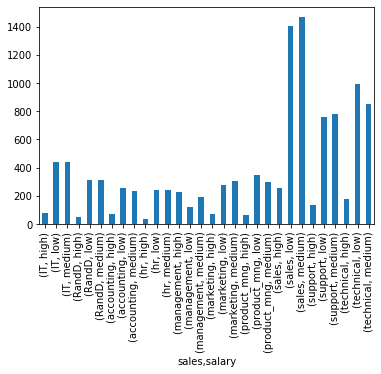

In [37]:
df_noleft_salary_sales['satisfaction_level'].plot(kind="bar")

## Посмотрим отношение кол-ва сотрудников по уровню зарплаты к общему кол-ву сотрудников в отделе.

In [38]:
df_noleft_salary_sales1 = df_noleft_salary_sales
for col in df['sales'].unique():
    df_noleft_salary_sales['satisfaction_level'][col] = df_noleft_salary_sales['satisfaction_level'][col]*100/df_noleft_salary_sales['satisfaction_level'][col].sum()
    
#df_noleft_salary_sales1['satisfaction_level']

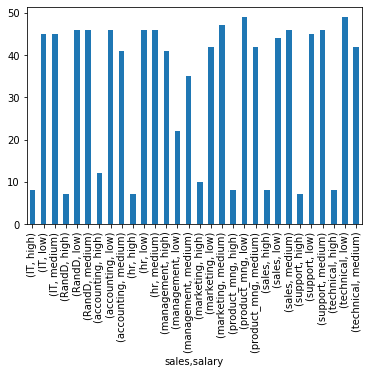

In [39]:
df_noleft_salary_sales1['satisfaction_level'].plot(kind="bar")

## 9. Сколько сотрудников покинули компанию.

In [40]:
df_left['left'].count()

3571

## 10. Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию.

In [ ]:
посмотрим зависимость satisfaction_level от average_montly_hours для тех, кто покинул компанию и тех кто остался.

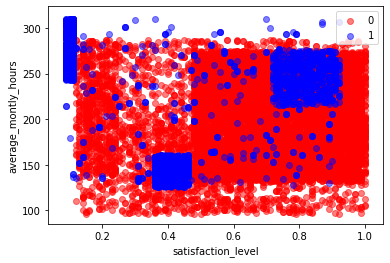

In [41]:
colx = 'satisfaction_level'
coly = 'average_montly_hours'

plt.scatter(df[colx][df['left'] == 0],
            df[coly][df['left'] == 0],
            alpha = 0.5,
            color = 'red',
            label = '0')

plt.scatter(df[colx][df['left'] == 1],
            df[coly][df['left'] == 1],
            alpha = 0.5,
            color = 'blue',
            label = '1')

plt.xlabel(colx)
plt.ylabel(coly)

plt.legend(loc='best')

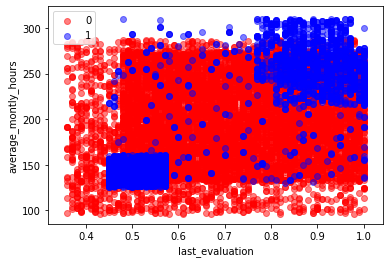

In [42]:
colx = 'last_evaluation'
coly = 'average_montly_hours'

plt.scatter(df[colx][df['left'] == 0],
            df[coly][df['left'] == 0],
            alpha = 0.5,
            color = 'red',
            label = '0')

plt.scatter(df[colx][df['left'] == 1],
            df[coly][df['left'] == 1],
            alpha = 0.5,
            color = 'blue',
            label = '1')

plt.xlabel(colx)
plt.ylabel(coly)

plt.legend(loc='best')

Видим 3 области:
    1. Много работают, но уровень удовлетворенности ниже 0.15
    2. Мало работают, уровень удовлетворенности около 0.4
    3. Много работают, высокий уровень удовлетворенности.

2 пункт нам не интересен, т.к. эти сотрудники работают мало и имеют низкую последнюю оценку. 
Рассмотрим пункты 1 и 3.


## Посмотрим на п.1 Много работают, но уровень удовлетворенности ниже 0.15

In [43]:
df02 = df[df['satisfaction_level'] < 0.15]
df02_left = df02[df02['left'] == 1]
df02_left
#df[[df['satisfaction_level'] < 0.2][df['left'] == 0]]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
2,0.11,0.88,7,272,4,0,1,0,sales,medium
6,0.10,0.77,6,247,4,0,1,0,sales,low
11,0.11,0.81,6,305,4,0,1,0,sales,low
20,0.11,0.83,6,282,4,0,1,0,sales,low
22,0.09,0.95,6,304,4,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14972,0.11,0.97,6,310,4,0,1,0,accounting,medium
14975,0.10,0.79,7,310,4,0,1,0,hr,medium
14979,0.09,0.93,6,296,4,0,1,0,technical,medium
14991,0.09,0.81,6,257,4,0,1,0,support,low


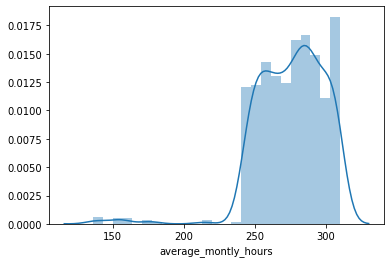

In [44]:
sns.distplot(df02_left["average_montly_hours"])

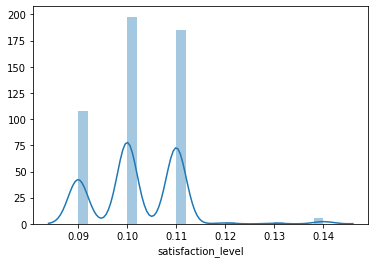

In [45]:
sns.distplot(df02_left["satisfaction_level"])

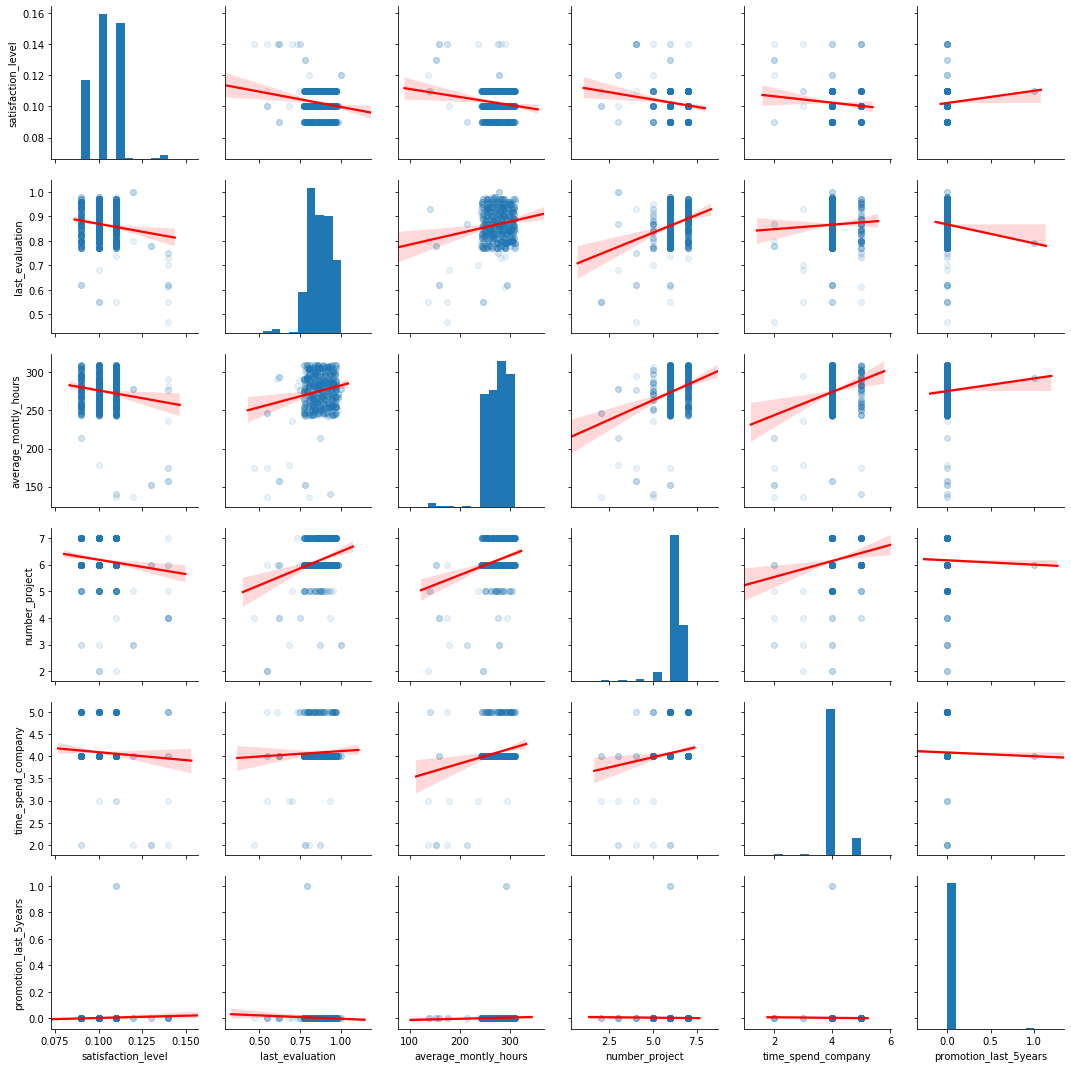

In [46]:
sns.pairplot(df02_left, vars=['satisfaction_level', 'last_evaluation', 'average_montly_hours', 'number_project', 'time_spend_company', 'promotion_last_5years'], kind='reg', plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.1}})

In [47]:
df02_left['salary'].value_counts()

low       536
medium    354
high       15
Name: salary, dtype: int64


Данные сотрудники недооценены:
    Высокая последняя оценка в диапазоне: 0.75 - 1
    Кол-во проектов: 5 - 7
    Стаж от 4-х лет
    Большое кол-во часов в месяц
    Очень низкий уровень удовлетворенности
    Не было повышений
    Низкий уровень зарплаты
    

## Посмотрим на п.3. Много работают, высокий уровень удовлетворенности.

In [48]:
df02 = df[df['satisfaction_level'] > 0.70]
df02_left = df02[df02['left'] == 1]
df02_left
#df[[df['satisfaction_level'] < 0.2][df['left'] == 0]]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
1,0.80,0.86,5,262,6,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
12,0.84,0.92,4,234,5,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14985,0.91,0.99,5,254,5,0,1,0,technical,medium
14986,0.85,0.85,4,247,6,0,1,0,technical,low
14987,0.90,0.70,5,206,4,0,1,0,technical,low
14990,0.89,0.88,5,228,5,1,1,0,support,low


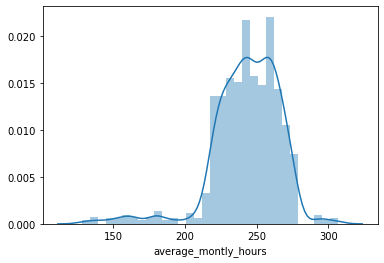

In [49]:
sns.distplot(df02_left["average_montly_hours"])

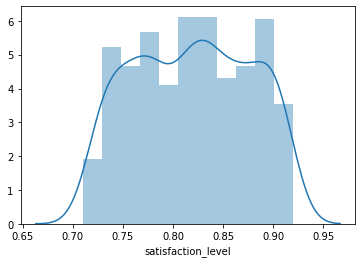

In [50]:
sns.distplot(df02_left["satisfaction_level"])

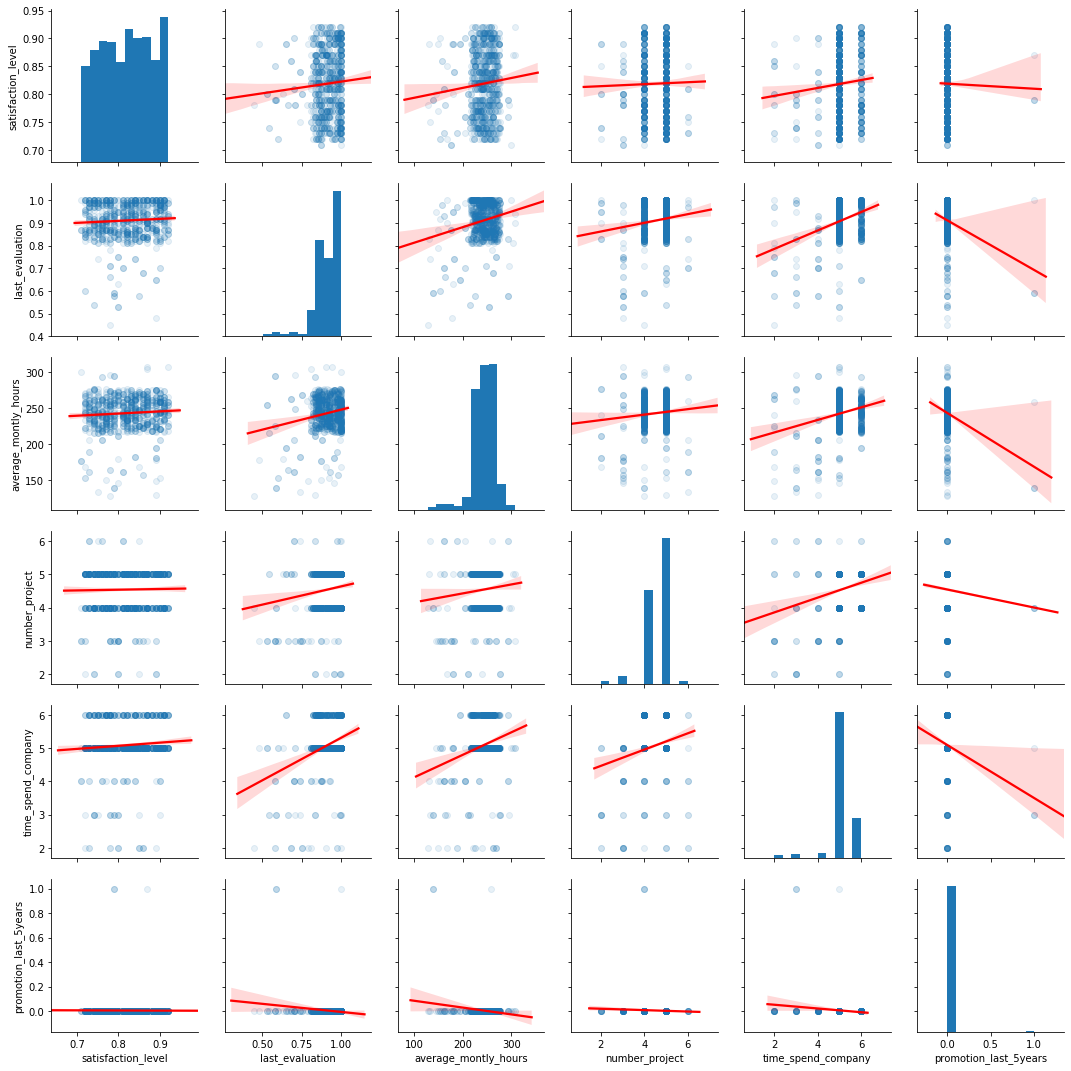

In [51]:
sns.pairplot(df02_left, vars=['satisfaction_level', 'last_evaluation', 'average_montly_hours', 'number_project', 'time_spend_company', 'promotion_last_5years'], kind='reg', plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.1}})

In [52]:
df02_left['salary'].value_counts()

low       563
medium    355
high       15
Name: salary, dtype: int64

In [ ]:
У данных сотрудников низкий уровень зарплаты и не было повышений, при этом:
    Высокая последняя оценка в диапазоне: 0.8 - 1
    Кол-во проектов: 4 - 5
    Стаж от 5-х лет
    Большое кол-во часов в месяц 210 - 280
    Уровень удовлетворенности > 0.7